# Exploratory Spatial Data Analysis of Traffic Accidents

Luke Zaruba, Bryan Runck

In [1]:
# Imports
import warnings

import contextily as ctx
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

## Data

In [6]:
# Importing from GeoJSON/SHP
incidents_gdf = gpd.read_file("../../data/core/INCIDENTS.geojson")
ctu_gdf = gpd.read_file("../../data/core/CTU.geojson")

## Descriptive Statistics

### Maps

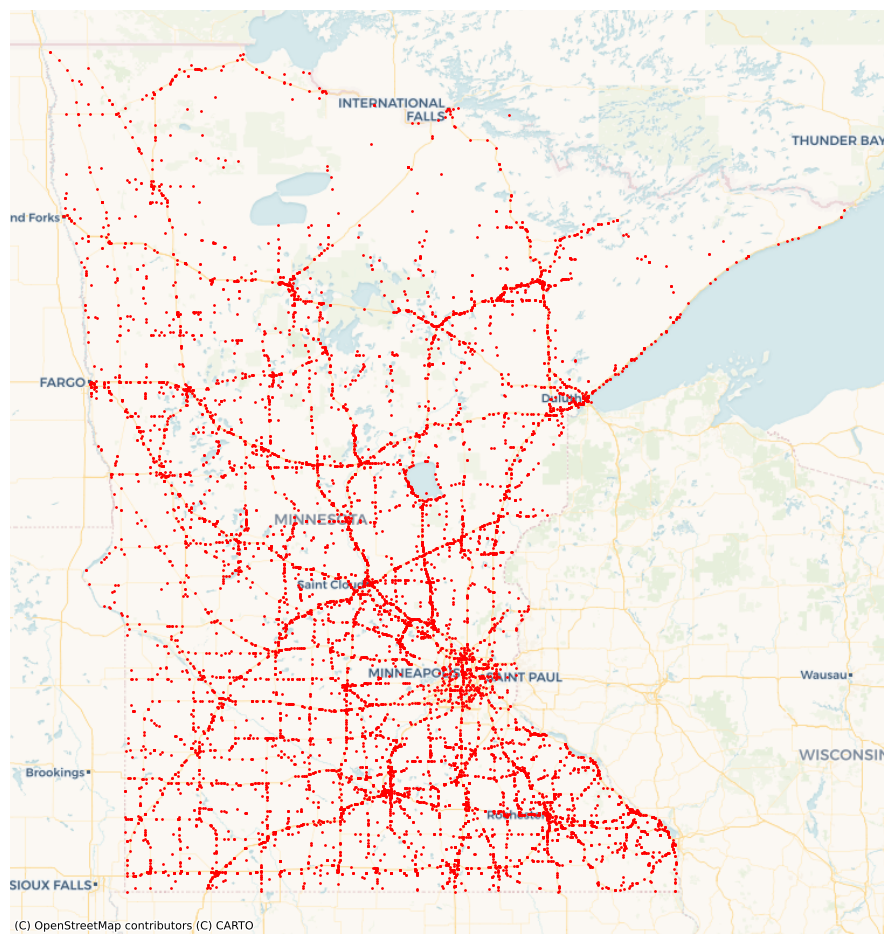

In [8]:
# Study Area Map
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

incidents_gdf.to_crs(epsg=3857).plot(
    ax=ax, marker="o", color="red", markersize=1
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

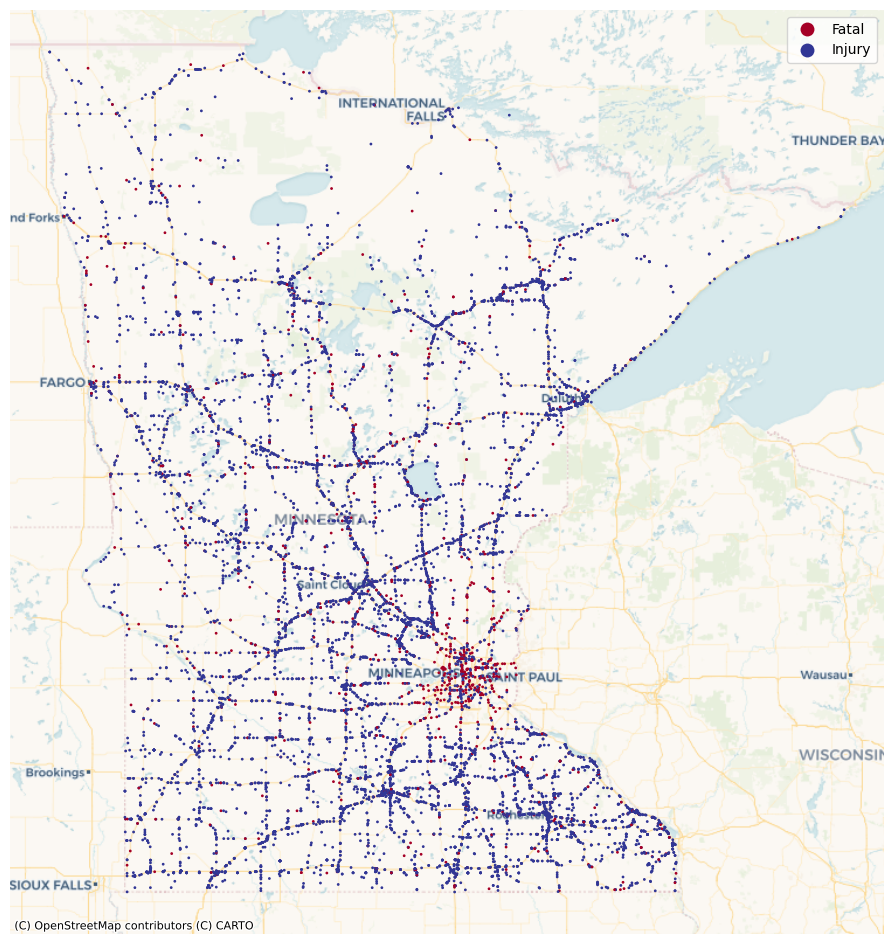

In [9]:
# Map of Accidents by Injury/Fatality
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

incidents_gdf.to_crs(epsg=3857).plot(
    ax=ax, column="incident_type", marker="o", markersize=1, legend=True, cmap="RdYlBu"
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

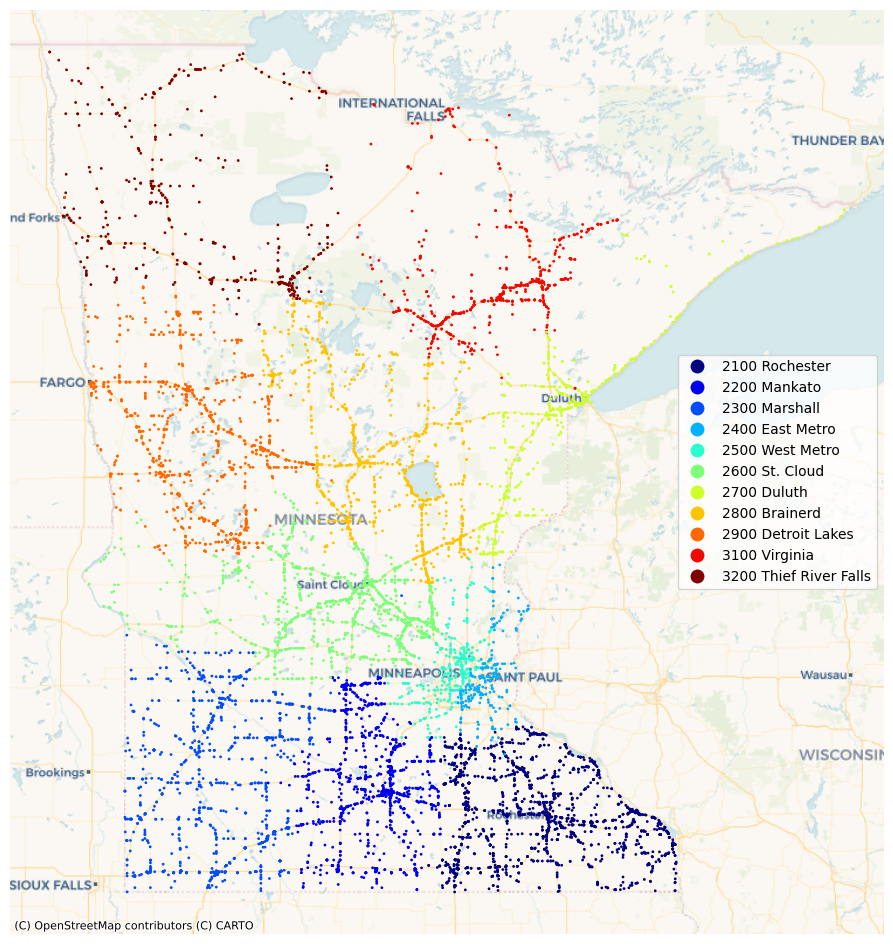

In [10]:
# Map of Accidents by District
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

incidents_gdf.to_crs(epsg=3857).plot(
    ax=ax, column="district", marker="o", markersize=1, legend=True, cmap="jet", legend_kwds={"loc": "center right"}
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### Tables

In [11]:
# Table of Accidents per Injury/Fatality
raw_acc_by_if = pd.DataFrame(incidents_gdf.groupby(by="incident_type")["icr"].count()).reset_index()
raw_acc_by_if["pct"] = round((raw_acc_by_if["icr"] / raw_acc_by_if["icr"].sum()) * 100, 1)
raw_acc_by_if.columns = ["Incident Type", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_if.to_string(index=False))

Incident Type  Frequency (n)  Percent (%)
        Fatal           1141         10.9
       Injury           9305         89.1


In [12]:
# Table of Accidents per Road Condition
raw_acc_by_cond = pd.DataFrame(incidents_gdf.groupby(by="road_condition")["icr"].count()).iloc[1:].reset_index()
raw_acc_by_cond["pct"] = round((raw_acc_by_cond["icr"] / raw_acc_by_cond["icr"].sum()) * 100, 1)
raw_acc_by_cond.columns = ["Road Condition", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_cond.to_string(index=False))

Road Condition  Frequency (n)  Percent (%)
           Dry           7369         70.6
         Other             42          0.4
      Snow/Ice           2015         19.3
           Wet           1019          9.8


In [13]:
# Table of Accidents per Vehicles Involved
raw_acc_by_vi = pd.DataFrame(incidents_gdf.groupby(by="vehicles_involved")["icr"].count()).reset_index()
raw_acc_by_vi = raw_acc_by_vi[raw_acc_by_vi["vehicles_involved"] != 999]
raw_acc_by_vi["pct"] = round((raw_acc_by_vi["icr"] / raw_acc_by_vi["icr"].sum()) * 100, 2)
raw_acc_by_vi.columns = ["Number of Vehicles Involved", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_vi.to_string(index=False))

 Number of Vehicles Involved  Frequency (n)  Percent (%)
                           1           4631        44.42
                           2           5004        48.00
                           3            609         5.84
                           4            130         1.25
                           5             30         0.29
                           6             13         0.12
                           7              4         0.04
                           8              1         0.01
                          10              2         0.02
                          12              1         0.01


In [14]:
# Table of Accident per District
raw_acc_by_di = pd.DataFrame(incidents_gdf.groupby(by="district")["icr"].count()).reset_index()
raw_acc_by_di["pct"] = round((raw_acc_by_di["icr"] / raw_acc_by_di["icr"].sum()) * 100, 2)
raw_acc_by_di.columns = ["MSP District", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_di.to_string(index=False))

          MSP District  Frequency (n)  Percent (%)
        2100 Rochester           2039        19.52
          2200 Mankato           1306        12.50
         2300 Marshall           1025         9.81
       2400 East Metro            263         2.52
       2500 West Metro            359         3.44
        2600 St. Cloud           1601        15.33
           2700 Duluth            666         6.38
         2800 Brainerd           1090        10.43
    2900 Detroit Lakes            983         9.41
         3100 Virginia            670         6.41
3200 Thief River Falls            444         4.25


In [15]:
# Table of Temporal Frequency by Season
season_lookup = {"01": "Winter", "02": "Winter", "03": "Spring", "04": "Spring", "05": "Spring", "06": "Summer", "07": "Summer", "08": "Summer", "09": "Fall", "10": "Fall", "11": "Fall", "12": "Winter"}

incident_season = incidents_gdf.copy()
incident_season["MONTH"] = incident_season.incident_date.dt.to_period("M").dt.strftime("%m")
incident_season["SEASON"] = incident_season.apply(lambda x: season_lookup.get(x.MONTH), axis=1)

raw_acc_by_season = pd.DataFrame(incident_season.groupby(by="SEASON")["icr"].count()).reset_index()
raw_acc_by_season["pct"] = round((raw_acc_by_season["icr"] / raw_acc_by_season["icr"].sum()) * 100, 2)
raw_acc_by_season.columns = ["Season", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_season.to_string(index=False))

Season  Frequency (n)  Percent (%)
  Fall           2683        25.68
Spring           2180        20.87
Summer           2914        27.90
Winter           2669        25.55


In [16]:
# Table of Temporal Frequency by Month
raw_acc_by_mo = pd.DataFrame(incidents_gdf.groupby(by=[incidents_gdf.incident_date.dt.to_period("M").dt.strftime("%m")])["icr"].count()).reset_index()
raw_acc_by_mo["pct"] = round((raw_acc_by_mo["icr"] / raw_acc_by_mo["icr"].sum()) * 100, 2)
raw_acc_by_mo.columns = ["Month", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_mo.to_string(index=False))

Month  Frequency (n)  Percent (%)
   01            956         9.15
   02            774         7.41
   03            714         6.84
   04            642         6.15
   05            824         7.89
   06            948         9.08
   07           1018         9.75
   08            948         9.08
   09            923         8.84
   10            892         8.54
   11            868         8.31
   12            939         8.99


In [17]:
# Table of Temporal Frequency by DoW - M, T, W, R, F, Sa, Su
raw_acc_by_dow = pd.DataFrame(incidents_gdf.groupby(by=[incidents_gdf.incident_date.dt.dayofweek])["icr"].count()).reset_index()
raw_acc_by_dow["pct"] = round((raw_acc_by_dow["icr"] / raw_acc_by_dow["icr"].sum()) * 100, 2)
raw_acc_by_dow.columns = ["Day of Week", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_dow.to_string(index=False))

 Day of Week  Frequency (n)  Percent (%)
           0           1472        14.09
           1           1452        13.90
           2           1495        14.31
           3           1546        14.80
           4           1688        16.16
           5           1539        14.73
           6           1254        12.00


In [18]:
# Table of Temporal Frequency by HoD
raw_acc_by_hod = pd.DataFrame(incidents_gdf.groupby(by=[incidents_gdf.incident_date.dt.hour])["icr"].count()).reset_index()
raw_acc_by_hod["pct"] = round((raw_acc_by_hod["icr"] / raw_acc_by_hod["icr"].sum()) * 100, 2)
raw_acc_by_hod.columns = ["Hour of Day", "Frequency (n)", "Percent (%)"]

print(raw_acc_by_hod.to_string(index=False))

 Hour of Day  Frequency (n)  Percent (%)
           0            138         1.32
           1            162         1.55
           2            147         1.41
           3             95         0.91
           4            114         1.09
           5            220         2.11
           6            435         4.16
           7            539         5.16
           8            527         5.04
           9            525         5.03
          10            498         4.77
          11            595         5.70
          12            632         6.05
          13            666         6.38
          14            636         6.09
          15            732         7.01
          16            703         6.73
          17            759         7.27
          18            578         5.53
          19            460         4.40
          20            386         3.70
          21            366         3.50
          22            269         2.58
          23    

### Charts

#### Heat Maps

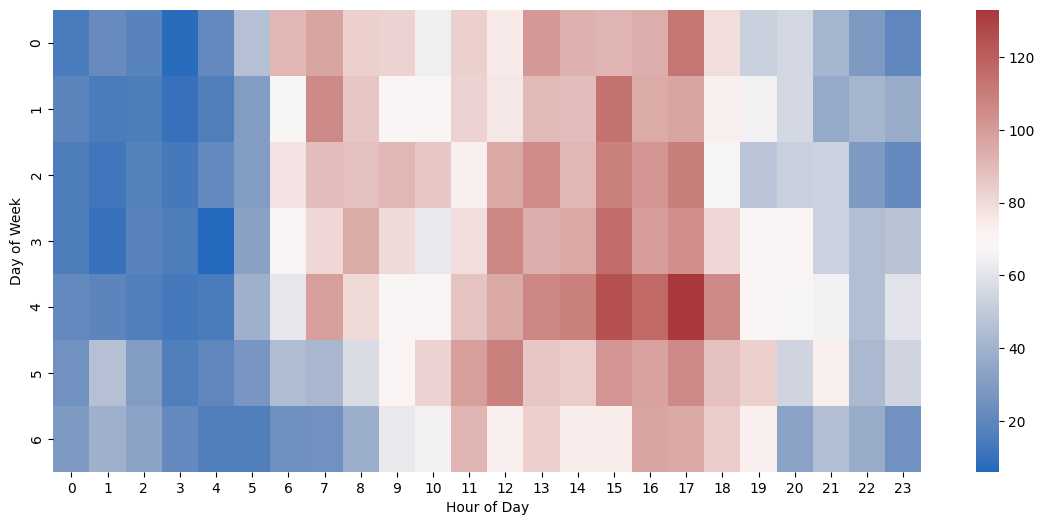

In [19]:
# Heat Map of Accident Counts per DoW and HoD
cluster_dow_hod = pd.DataFrame(incidents_gdf.groupby(by=[incidents_gdf.incident_date.dt.dayofweek.rename("DOW"), incidents_gdf.incident_date.dt.hour])["icr"].count()).reset_index()

cluster_dow_hod.columns = ["Day of Week", "Hour of Day", "Count"]

cluster_dow_hod = cluster_dow_hod.pivot(values = "Count", index = "Day of Week", columns = "Hour of Day")

fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(cluster_dow_hod, cmap = "vlag", ax=ax);

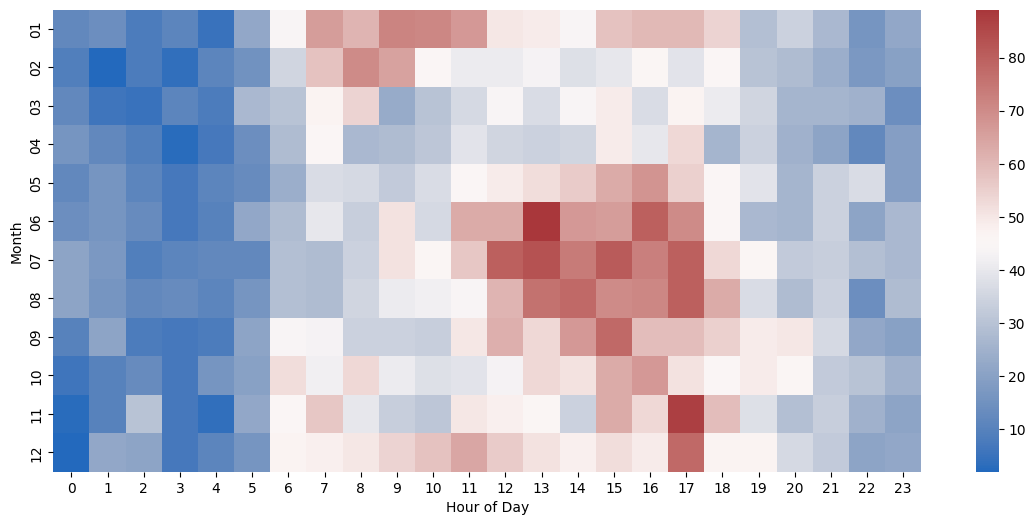

In [20]:
# Heat Map of Accident Counts per Month and HOD
cluster_mon_hod = pd.DataFrame(incidents_gdf.groupby(by=[incidents_gdf.incident_date.dt.to_period("M").dt.strftime("%m").rename("M"), incidents_gdf.incident_date.dt.hour])["icr"].count()).reset_index()

cluster_mon_hod.columns = ["Month", "Hour of Day", "Count"]

cluster_mon_hod = cluster_mon_hod.pivot(values = "Count", index = "Month", columns = "Hour of Day")

fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(cluster_mon_hod, cmap = "vlag", ax=ax);

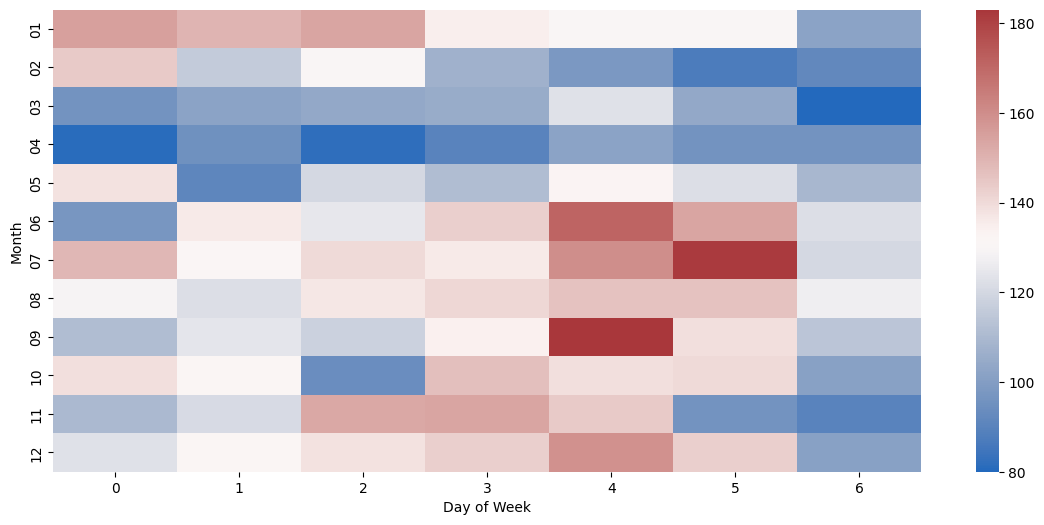

In [21]:
# Heat Map of Accident Counts per Month and DOW
cluster_mon_dow = pd.DataFrame(incidents_gdf.groupby(by=[incidents_gdf.incident_date.dt.to_period("M").dt.strftime("%m").rename("M"), incidents_gdf.incident_date.dt.dayofweek.rename("DOW")])["icr"].count()).reset_index()

cluster_mon_dow.columns = ["Month", "Day of Week", "Count"]

cluster_mon_dow = cluster_mon_dow.pivot(values = "Count", index = "Month", columns = "Day of Week")

fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(cluster_mon_dow, cmap = "vlag", ax=ax);